In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [72]:
data = pd.read_csv('../raw_data/data_for_ml.csv')

In [73]:
data.sample(15)

,UserID,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,...,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6
408,438.0,Enthusiastic and results-oriented product mana...,Product Manager @ JET,"Berlin, Berlin, Germany",just eat takeaway.com,Product Manager,Working with two back-end teams responsible fo...,"Berlin, Germany",Aug 2022 - Present,1 yr 8 mos,...,Product Operations,NaN,Product Strategy,42.0,Project Management,5.0,Lavoro di squadra,14.0,Digital Transformation,2.0
434,453.0,A passionate product manager with +10 years of...,Product Manager | Product Owner,"Berlin, Berlin, Germany",solico group,Product Manager (Solico Portal),Solico Group is a multinational food company. ...,"Tehran Province, Iran",Apr 2019 - Jul 2023,4 yrs 4 mos,...,SharePoint,26.0,Scrum,1.0,Business Process,3.0,Integration,81.0,Web Applications,27.0
110,520.0,NaN,Venture Building | LogTech | Supply Chain,"Berlin, Berlin, Germany",xpress ventures,Venture Architect,Skills: Portfolio Reporting · Investmentmanage...,"Berlin, Deutschland",May 2022 - Present,1 yr 10 mos,...,Strategische Partnerschaften,1.0,Dealflow,NaN,Due Diligence,NaN,Business model validation,NaN,Portfolio Reporting,NaN
389,622.0,A holistic product manager with a background i...,Creating technical products in sustainability ...,"Berlin, Berlin, Germany",inhabit,Product Advisor,Developing Net Zero products to help SMEs deca...,NaN,Oct 2023 - Present,6 mos,...,Financial Reporting,NaN,Product Development,54.0,Business Analysis,NaN,Product Management,NaN,Data Visualization,NaN
468,255.0,"Experienced researcher, newly certified data a...",Data scientist\n,"Berlin, Berlin, Germany",the makers,Data Scientist,* Ingestion scripts\n* ETL pipeline AWS\n* Dee...,NaN,Jan 2022 - Present,2 yrs 3 mos,...,Molecular Biology,32.0,Databases,NaN,R (Programming Language),21.0,Statistics,32.0,Life Sciences,31.0
26,93.0,NaN,Techie | Product Mindset | Community Manager,"Berlin, Berlin, Germany",vestiaire collective,Senior iOS Engineer,Skills: iOS · Swift · SwiftUI · Bitrise · Scrum,"Berlin, Germany",May 2023 - Present,10 mos,...,Software Development,NaN,Entrepreneurship,NaN,Product Strategy,NaN,Product Management,NaN,Teaching,NaN
123,674.0,NaN,LegalTech & AI advisor and speaker | Legal Ope...,"Berlin, Berlin, Germany",noerr,Legal Operations Expert,"Designing, optimizing and automating internal ...","Berlin, Deutschland · Hybrid",Feb 2024 - Present,1 mo,...,Networking,NaN,Soziale Medien,NaN,Community Organizing,NaN,Eventplanung,NaN,Prompt Engineering,NaN
217,182.0,Ex-consultant & developer turned Head of Produ...,Head of Product | Making ground transportation...,Berlin Metropolitan Area,distribusion technologies,Head of Product,Distribusion is a Series B startup that aims t...,"Berlin, Germany · On-site",Dec 2022 - Present,1 yr 4 mos,...,Product Leadership,2.0,Corporate Governance,NaN,Software Development Management,1.0,Product management,6.0,Data analysis & Business analytics,5.0
226,166.0,Have a great idea? Let's build a great product...,Founder of the First Product Bootcamp for Firs...,United Kingdom,firstgeneration.tech,Founder,First Product Bootcamp for First-Time Tech Fou...,"London, England, United Kingdom · Remote",Feb 2024 - Present,2 mos,...,Growth Strategies,43.0,Presentations,32.0,Problem Solving,32.0,Product Requirements,52.0,User Stories,NaN
356,375.0,Discover my full professional background at lu...,Product Owner Usercentrics | Podcast Host | Fo...,Berlin Metropolitan Area,usercentrics,Product Owner,Skills: Agile Project Management · Projektplan...,Metropolregion München · Remote,Feb 2023 - Present,1 yr 2 mos,...,Product Launch,21.0,Product Hunt,21.0,Product Marketing,21.0,Projektmanagement,10.0,Webentwicklung,13.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              475 non-null    float64
 1   description         350 non-null    object 
 2   headline            475 non-null    object 
 3   location            475 non-null    object 
 4   company             474 non-null    object 
 5   jobTitle            473 non-null    object 
 6   jobDescription      321 non-null    object 
 7   jobLocation         418 non-null    object 
 8   jobDateRange        470 non-null    object 
 9   jobDuration         469 non-null    object 
 10  company2            467 non-null    object 
 11  jobTitle2           466 non-null    object 
 12  jobDescription2     388 non-null    object 
 13  jobLocation2        398 non-null    object 
 14  jobDuration2        466 non-null    object 
 15  school              464 non-null    object 
 16  schoolDe

In [75]:
# merge columns to a metadata column
# Specify the columns to merge
data.fillna("", inplace=True)
#columns_to_merge = ['headline','description', 'jobTitle','jobDescription','jobTitle2', 'schoolDegree', 'skill1', 'skill2', 'skill3','skill4', 'skill5', 'skill6']
columns_to_merge = ['headline','description', 'jobTitle','jobDescription','jobTitle2', 'skill1', 'skill2', 'skill3']
# Merge specified columns into one column
data['metadata'] = data[columns_to_merge].apply(lambda row: ' '.join(row), axis=1)

/var/folders/5f/td3vxmq52mgbxcd36rlnh7wc0000gn/T/ipykernel_10495/214941109.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("", inplace=True)


In [76]:
data.sample(10)

,UserID,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
360,593.0,Throughout my career I connected the dots betw...,Communication Expert| Data Person | | Social M...,"Berlin, Berlin, Germany",media partisans gmbh,Media Partisans GmbH - Social Media Manager/ J...,• Managed a 700K-follower YouTube channel in t...,,Jun 2020 - May 2023,3 yrs,...,,Statistical Data Analysis,,Interviewing,2.0,Web Content Writing,,Social Media Writing,43.0,Communication Expert| Data Person | | Social M...
112,579.0,,Associate Product Manager @ Metaloop,"Berlin, Berlin, Germany",metaloop,Associate Product Manager,"First product manager hired after CPO, focusin...",,Aug 2023 - Present,7 mos,...,2.0,User Experience (UX),2.0,Process Improvement,1.0,User Research,2.0,Product Analytics,,Associate Product Manager @ Metaloop Associat...
212,483.0,I'm passionate about building products for imp...,Co-founder & CPO at Klim ⎢Scaling Regenerative...,Berlin Metropolitan Area,klim,Co-founder & Chief Product Officer,🌟 Forbes 30 under 30\n🌟 Veuve Clicquot Bold Fu...,"Berlin, Germany",Sep 2020 - Present,3 yrs 7 mos,...,,,,,,,,,,Co-founder & CPO at Klim ⎢Scaling Regenerative...
248,108.0,"Pioneered the strategic, commercial, and opera...",Sr. Product Manager @ Packt,"Berlin, Berlin, Germany",packt,Senior Product Manager,"I own the strategic, commercial and operationa...","Berlin, Germany",Dec 2022 - Present,1 yr 4 mos,...,,Leadership,,Communication,5.0,Teamwork,,Marketing,9.0,Sr. Product Manager @ Packt Pioneered the stra...
259,638.0,"Hello! I'm Srishti Maitra, a tech enthusiast w...",Product Manager | WHU MBA | ESCP Business Scho...,"Berlin, Berlin, Germany",escp business school,Student Ambassador,• Represented ESCP’s flagship MIM Program on v...,,Sep 2021 - Present,2 yrs 7 mos,...,7.0,C++,6.0,Microsoft SQL Server,1.0,Leadership,4.0,Project Management,5.0,Product Manager | WHU MBA | ESCP Business Scho...
153,176.0,Experienced SaaS Product Manager,Senior Product Manager,"Berlin, Berlin, Germany",ride.,Senior Product Manager,,"Berlin, Germany · Remote",Sep 2023 - Present,6 mos,...,1.0,Programming,17.0,Laboratory,3.0,Physics,26.0,AFM,1.0,Senior Product Manager Experienced SaaS Produc...
326,689.0,"Technical Product Manager, focused and driven ...",Data Product Manager,"Berlin, Berlin, Germany",delivery hero,Senior Data Product Manager,Technical Product Manager for the Global Data ...,"Berlin, Germany",Oct 2022 - Present,1 yr 6 mos,...,12.0,Product Engineering,13.0,Big Data,6.0,Agile,10.0,Product Development,12.0,Data Product Manager Technical Product Manager...
85,115.0,,Geschäftsführer bei The Injera Company GmbH,"Berlin, Berlin, Germany",the injera company gmbh,Geschäftsführer,,,Oct 2021 - Present,2 yrs 5 mos,...,,,,,,,,,,Geschäftsführer bei The Injera Company GmbH G...
44,412.0,As a Senior Recruiter with now 24000+ follower...,"Senior Recruiter in Design, Product & Technolo...","Berlin, Berlin, Germany",mr. recruitment,"Senior Digital Recruiter in UX/UI Design, Prod...","▶️ I help scaling-up Design-, Product-, Engine...","Berlin Area, Germany",Apr 2014 - Present,9 yrs 11 mos,...,1.0,Event Management,,Career Counseling,1.0,Career Development Coaching,1.0,FigJam,,"Senior Recruiter in Design, Product & Technolo..."
147,597.0,,Striving for Innovation,"Berlin, Berlin, Germany",axel springer,Product Owner Cloud & Data,Skills: Amazon Web Services (AWS) · Jira · AWS...,"Berlin, Germany",Nov 2023 - Present,4 mos,...,,Kubernetes,,Containerization,,Docker,,Hybrid Cloud,,Striving for Innovation Product Owner Cloud &...


In [58]:
import re # REGEX
import string 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# [] ---> character set (match any character in the set)
# ^ ---> starting with 
# [^ ] ---> negated set (match any character that is NOT in the set)
# \w ---> special class called "word characters". It is shorthand for [a-zA-Z0-9_]
# + ---> match as many times as possible (greedy quantifier)
# ? ---> match as few characters as possible (lazy quantifier)
# +? ---> match one character at once

def basic_cleaning(sentence):
    # TODO: Apply all cleaning methods used above
    # 1. Removing whitespaces
    sentence = sentence.strip()

    # 2. Lowercasing
    sentence = sentence.lower()

    # 3. Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # remove tags
    sentence = re.sub('<[^<]+>', "", sentence)

    # 4. Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
        
    #5 remove non-alpha characters
    sentence = sentence.replace(r'[^a-zA-Z\s]', '')
    
    return sentence

In [77]:
data['metadata'] = data.metadata.apply(basic_cleaning)

In [78]:
data

,UserID,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
0,512.0,Experienced professional with the ability to c...,"General Manager - US Finance, Legal, HR, Accou...","Carrollton, Texas, United States",orbis systems,"General Manager, Orbis International Technolog...",A highly driven professional leading the US op...,"Carrollton, Texas, United States",May 2022 - Present,1 yr 10 mos,...,21.0,Strategic Planning,21.0,Forecasting,21.0,Organizational Development,21.0,Business Strategy,21.0,general manager us finance legal hr accountin...
1,652.0,"I am a Product Owner at World Simplified UG, a...",Tech product support intern at Holidu,"Berlin, Berlin, Germany",holidu,Tech product support intern,,"Munich, Bavaria, Germany · Hybrid",Oct 2023 - Present,5 mos,...,,Team Leadership,,Cross-functional Team Leadership,1.0,Project Planning,21.0,Business Development,,tech product support intern at holidu i am a p...
2,618.0,Designer & Problem Solver | CS Student | Aimin...,Making Interfaces Sexier - UI/UX/Dev,"Berlin, Berlin, Germany",a.t.e.m. management gmbh,Web Designer,Skills: Web Design · Cascading Style Sheets (C...,"Berlin, Germany",Aug 2022 - Present,1 yr 7 mos,...,,JavaScript,2.0,Cascading Style Sheets (CSS),2.0,Front-End Development,1.0,Wireframing,1.0,making interfaces sexier uiuxdev designer pr...
3,96.0,,Product & Growth,"Berlin, Berlin, Germany",clink,Chief Experience Officer,,"Berlin, Germany",Sep 2023 - Present,6 mos,...,40.0,Cross-functional Team Leadership,3.0,Business Development,33.0,Mobile Applications,10.0,Mobile Technology,35.0,product growth chief experience officer chi...
4,194.0,As a product marketing manager at the JetBrain...,Product marketing manager at JetBrains | Mentor,"Berlin, Berlin, Germany",jetbrains,Product Marketing Manager,,"Berlin, Germany",Oct 2021 - Present,2 yrs 5 mos,...,8.0,Marketing Communications,8.0,Customer Insight,13.0,Market Analysis,12.0,Marketing Research,11.0,product marketing manager at jetbrains mentor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,229.0,As a Senior Product Manager with over 12+ year...,Product Manager @ KAYAK,"Berlin, Berlin, Germany",kayak,Product Manager,,"Berlin, Germany · On-site",Nov 2023 - Present,5 mos,...,1.0,Customer Onboarding,1.0,Mentoring,1.0,Product Development,1.0,Analytical Skills,,product manager kayak as a senior product man...
471,461.0,A lady with a previous marketing background an...,Junior Product Designer✨| UX/UI | Figma | Rese...,"Berlin, Berlin, Germany",velents,Junior Product Designer,Velents AI is a hiring platform that will help...,"Berlin, Germany · Remote",May 2023 - Present,11 mos,...,,Prototyping,,User Research,,User Experience Design (UED),,Design Systems,21.0,junior product designer✨ uxui figma research...
472,10.0,"A passionate Product Leader Focused on People,...",Product Leader & Mentor • Lead Product Manager...,"Berlin, Berlin, Germany",spryker,Lead Product Manager,Skills: Product Management · Team Leadership ·...,"Berlin, Germany · Remote",Aug 2022 - Present,1 yr 8 mos,...,2.0,Problem Solving,41.0,Team Management,,Technical Understanding,31.0,Product Road Mapping,3.0,product leader mentor • lead product manager ...
473,249.0,"Product Management, Data & Technology enthusia...",Product @HelloFresh,"Berlin, Berlin, Germany",hellofresh,Director of Product,- Driving product alignment and prioritization...,,Jul 2022 - Present,1 yr 9 mos,...,,Data Visualization,,System Design,,Executive Presentation,,Agile Methodologies,,product hellofresh product management data te...


In [38]:
from nltk import word_tokenize

stop_words = set(stopwords.words('english')) 

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords


def lemma(text):
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string


In [79]:
data['metadata'] = data.metadata.apply(remove_stopwords)

data[['metadata']]

,metadata
0,"[general, manager, us, finance, legal, hr, acc..."
1,"[tech, product, support, intern, holidu, produ..."
2,"[making, interfaces, sexier, uiuxdev, designer..."
3,"[product, growth, chief, experience, officer, ..."
4,"[product, marketing, manager, jetbrains, mento..."
...,...
470,"[product, manager, kayak, senior, product, man..."
471,"[junior, product, designer✨, uxui, figma, rese..."
472,"[product, leader, mentor, •, lead, product, ma..."
473,"[product, hellofresh, product, management, dat..."


In [80]:
data['metadata'] = data.metadata.apply(lemma)
data[['metadata']]

,metadata
0,general manager u finance legal hr accounting ...
1,tech product support intern holidu product own...
2,making interface sexier uiuxdev designer probl...
3,product growth chief experience officer chief ...
4,product marketing manager jetbrains mentor pro...
...,...
470,product manager kayak senior product manager y...
471,junior product designer✨ uxui figma research e...
472,product leader mentor • lead product manager s...
473,product hellofresh product management data tec...


In [81]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['metadata'])
count_df = pd.DataFrame(count_matrix.toarray(), index=data.index.tolist())
count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6539,6540,6541,6542,6543,6544,6545,6546,6547,6548
0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
count_df

,0,1,2,3,4,5,6,7,8,9,...,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [82]:
# Apply SVD
svd = TruncatedSVD(n_components=80)
latent_df = svd.fit_transform(count_df)


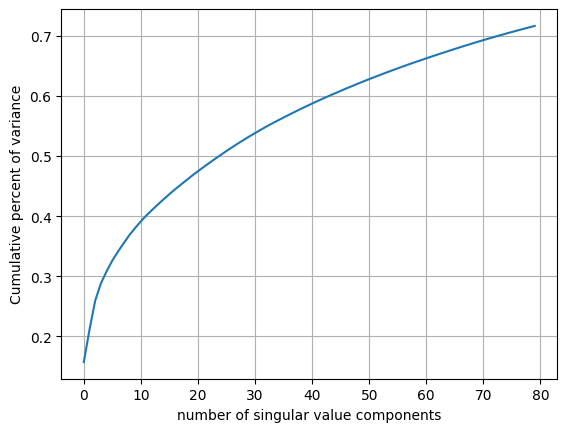

In [83]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [22]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/yulka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yulka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yulka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/yulka/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
# Apply SVD
svd = TruncatedSVD(n_components=15)
latent_df = svd.fit_transform(count_df)

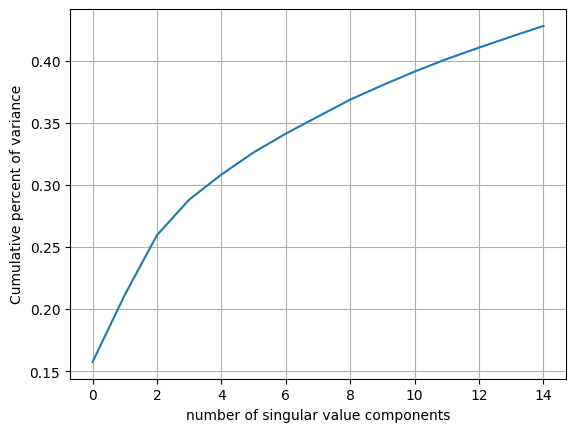

In [86]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()